# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 16,
  "PH2" : True,
  "PH3" : True,
  "reducer" : sup.PH3_REDUCER_NAME_PCA,
  "kernel" : '',
  "n" : 15,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 2000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,f0_0,f0_1,f0_2,f0_3,f0_4,f0_5,f0_6,f0_7,f0_8,...,f11_5,f11_6,f11_7,f11_8,f11_9,f11_10,f11_11,f11_12,f11_13,f11_14
0,28,-6.173517,5.814891,-2.112251,-0.276642,-0.479390,1.002511,-0.049623,0.000958,0.177771,...,1.094897,0.176779,0.033022,0.291682,-0.800625,0.310067,-0.026792,-1.000834,-0.396098,0.069939
1,36,-4.911305,-5.905577,4.503756,0.276177,-0.598751,0.091008,0.501300,0.678168,-0.287076,...,1.354629,-0.089166,1.181792,0.433439,0.029832,0.099633,-0.056620,-0.833824,-0.031606,0.246391
2,29,-6.043490,5.202283,-3.167242,-0.022622,-0.360075,1.113706,-0.153455,0.141006,0.092755,...,1.406823,0.214343,0.563984,0.247223,-0.370363,0.241654,-0.194367,-1.088593,-0.281117,0.214236
3,30,-6.119119,5.023941,-3.713428,0.817506,-0.827220,1.501254,-0.153828,0.418482,0.024091,...,1.774167,0.068100,0.210873,-0.066263,-0.448953,0.263794,-0.152208,-0.984253,-0.358642,0.330658
4,31,-6.142796,3.728375,-3.869311,0.887036,-0.517125,1.355770,-0.327408,0.680074,0.140782,...,1.739412,-0.013928,0.271779,-0.104725,-0.404460,0.045437,-0.120468,-0.968464,-0.285156,0.344958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,23,-1.534137,4.337369,4.733756,0.923203,-1.232437,-0.239292,0.258896,1.099884,-0.256409,...,-0.418662,0.107147,1.097912,-0.280947,0.263160,0.111539,0.166834,-0.015437,0.007704,0.302075
3897,24,-1.609169,3.805038,5.360603,0.415526,-1.204325,-0.214920,0.137177,1.381695,-0.267144,...,-0.444997,0.347375,1.321030,-0.093100,0.206781,0.173964,0.136873,-0.000522,-0.123095,0.312311
3898,25,-2.146409,2.951787,0.748313,2.109704,-0.624698,-1.269497,-0.174812,-0.235952,-1.282568,...,-0.315685,-0.387734,0.242262,-0.370673,0.454595,-0.383699,-0.184937,-0.064044,0.149338,0.034248
3899,26,-2.028881,12.325063,0.683790,1.136634,-1.826522,-0.002828,0.359681,0.393180,-0.050000,...,0.818700,-0.234430,0.589026,0.976530,0.328726,-0.023292,-0.095656,0.412819,0.049565,0.052724


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.645326504481434
0.7797695262483995
0.6450087773986193
0.6596070202376569
0.6436568489200067


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


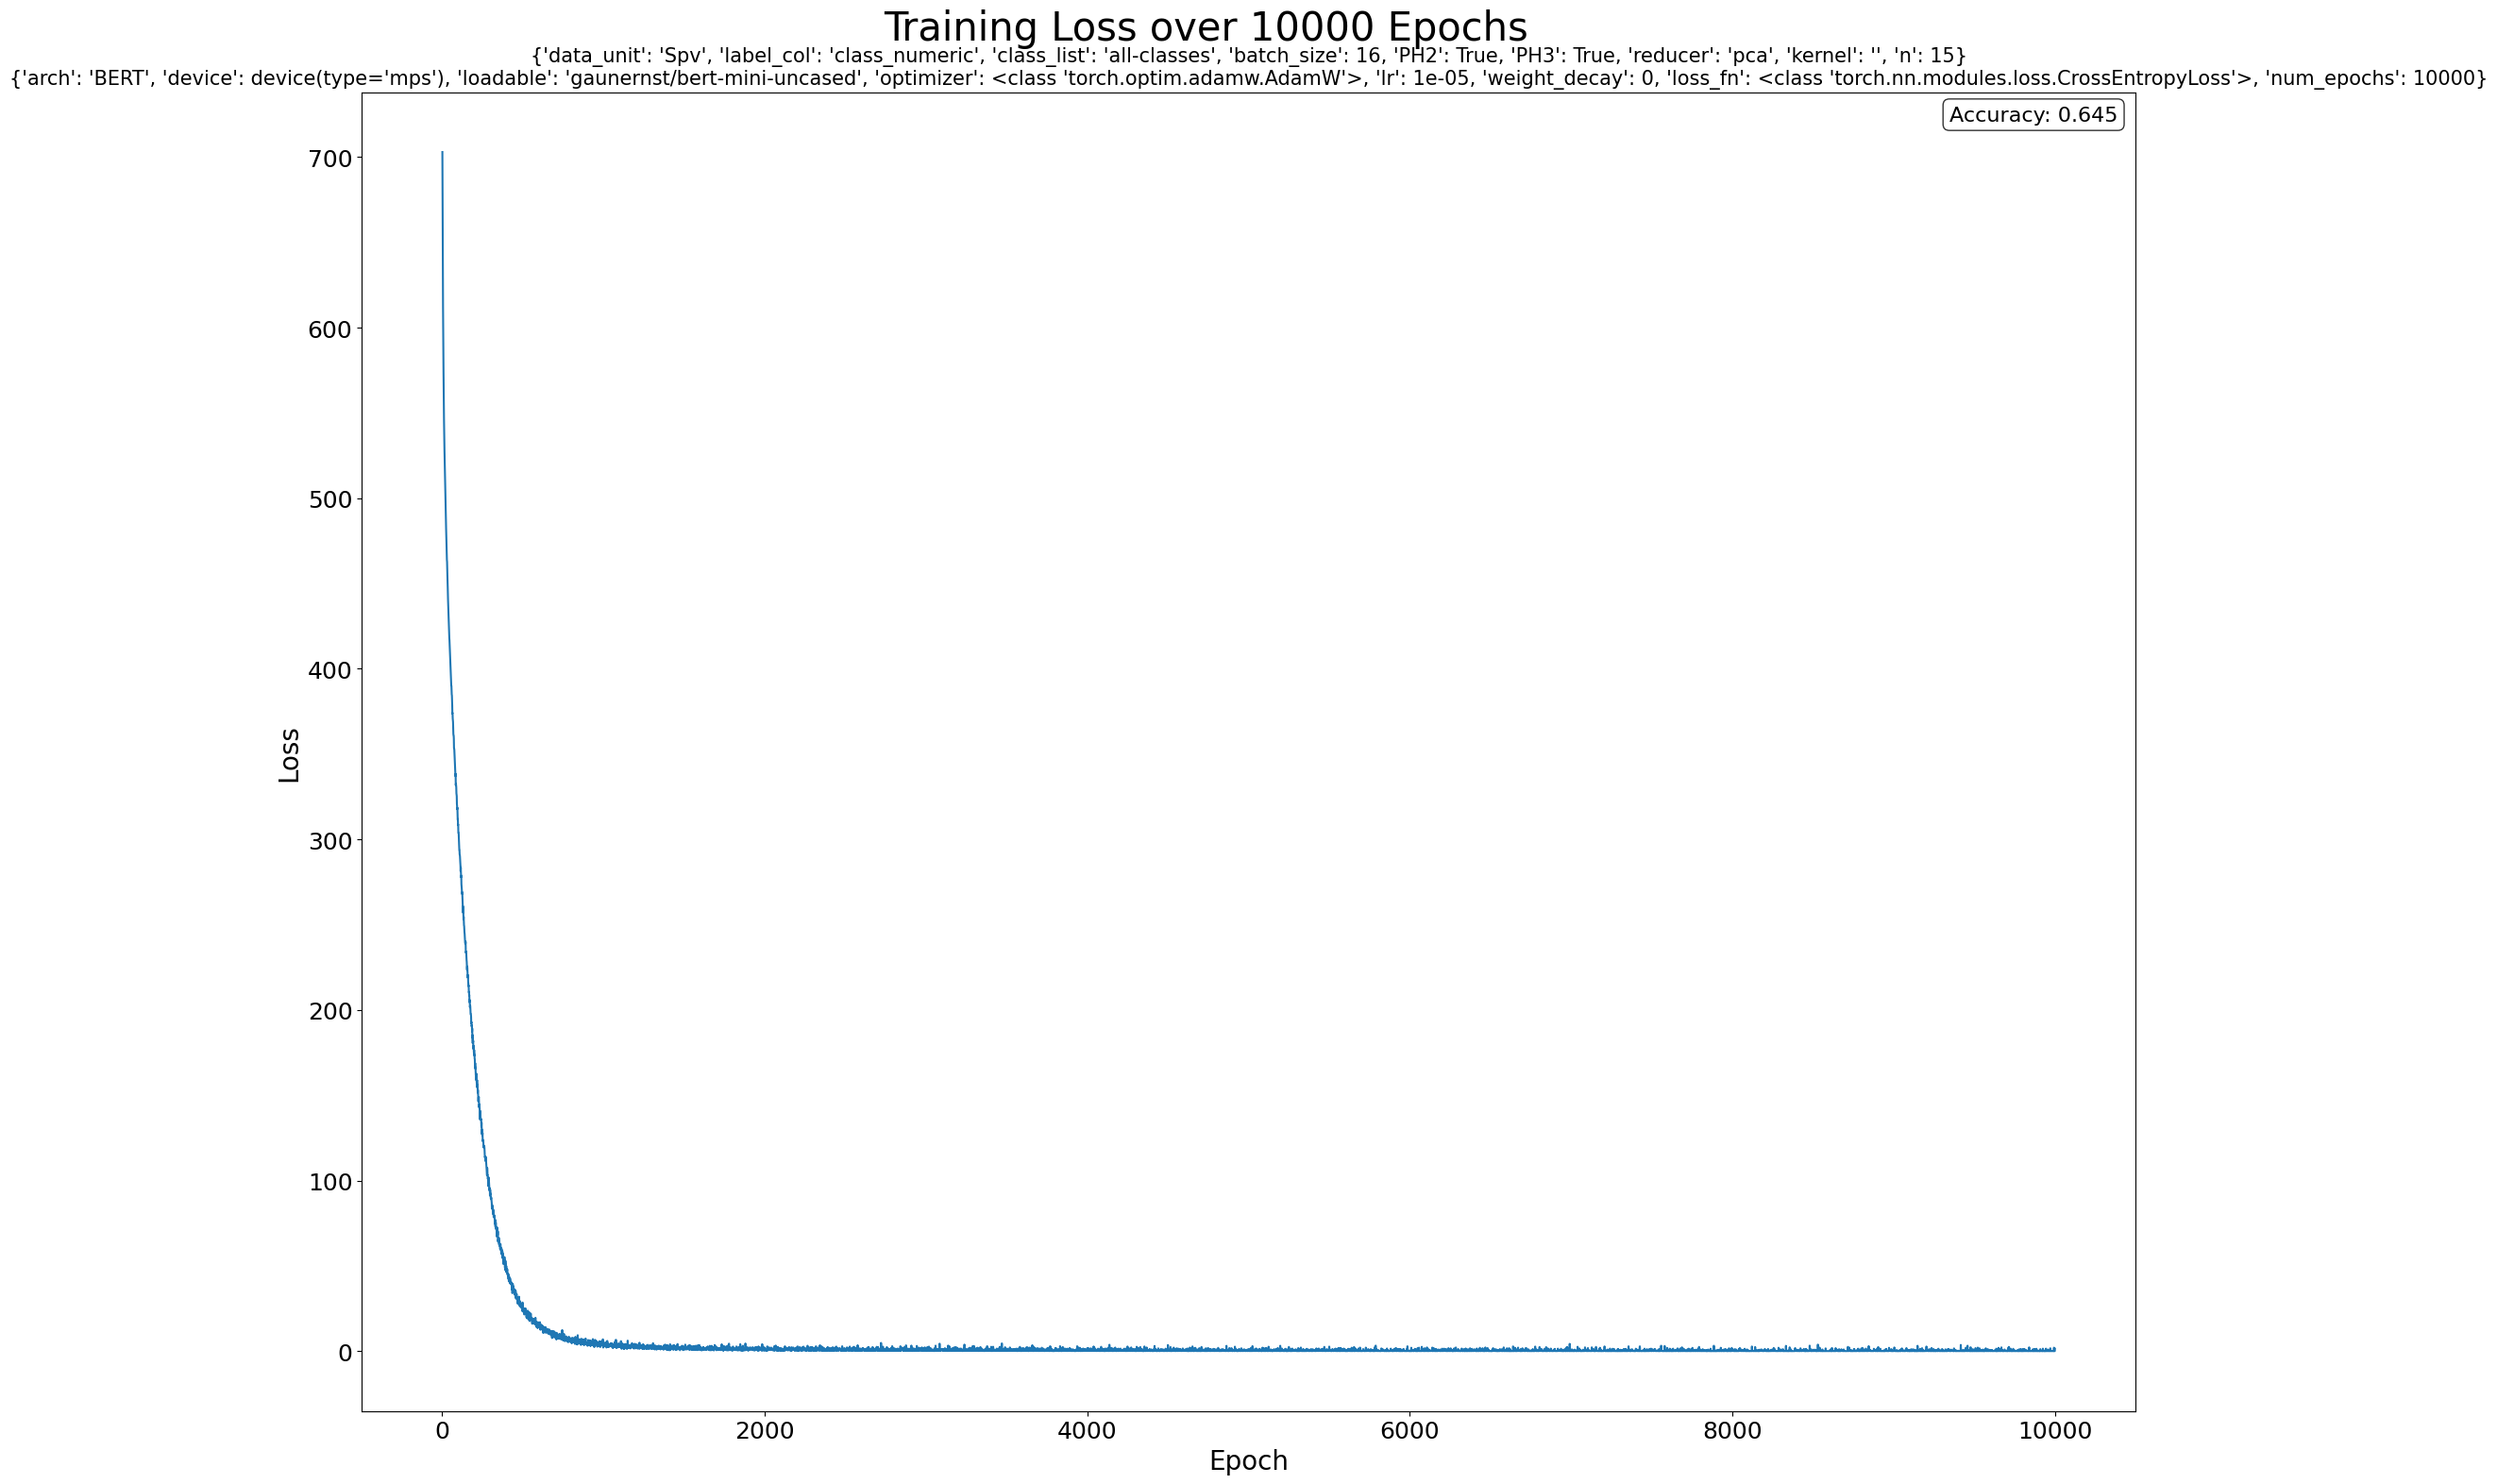

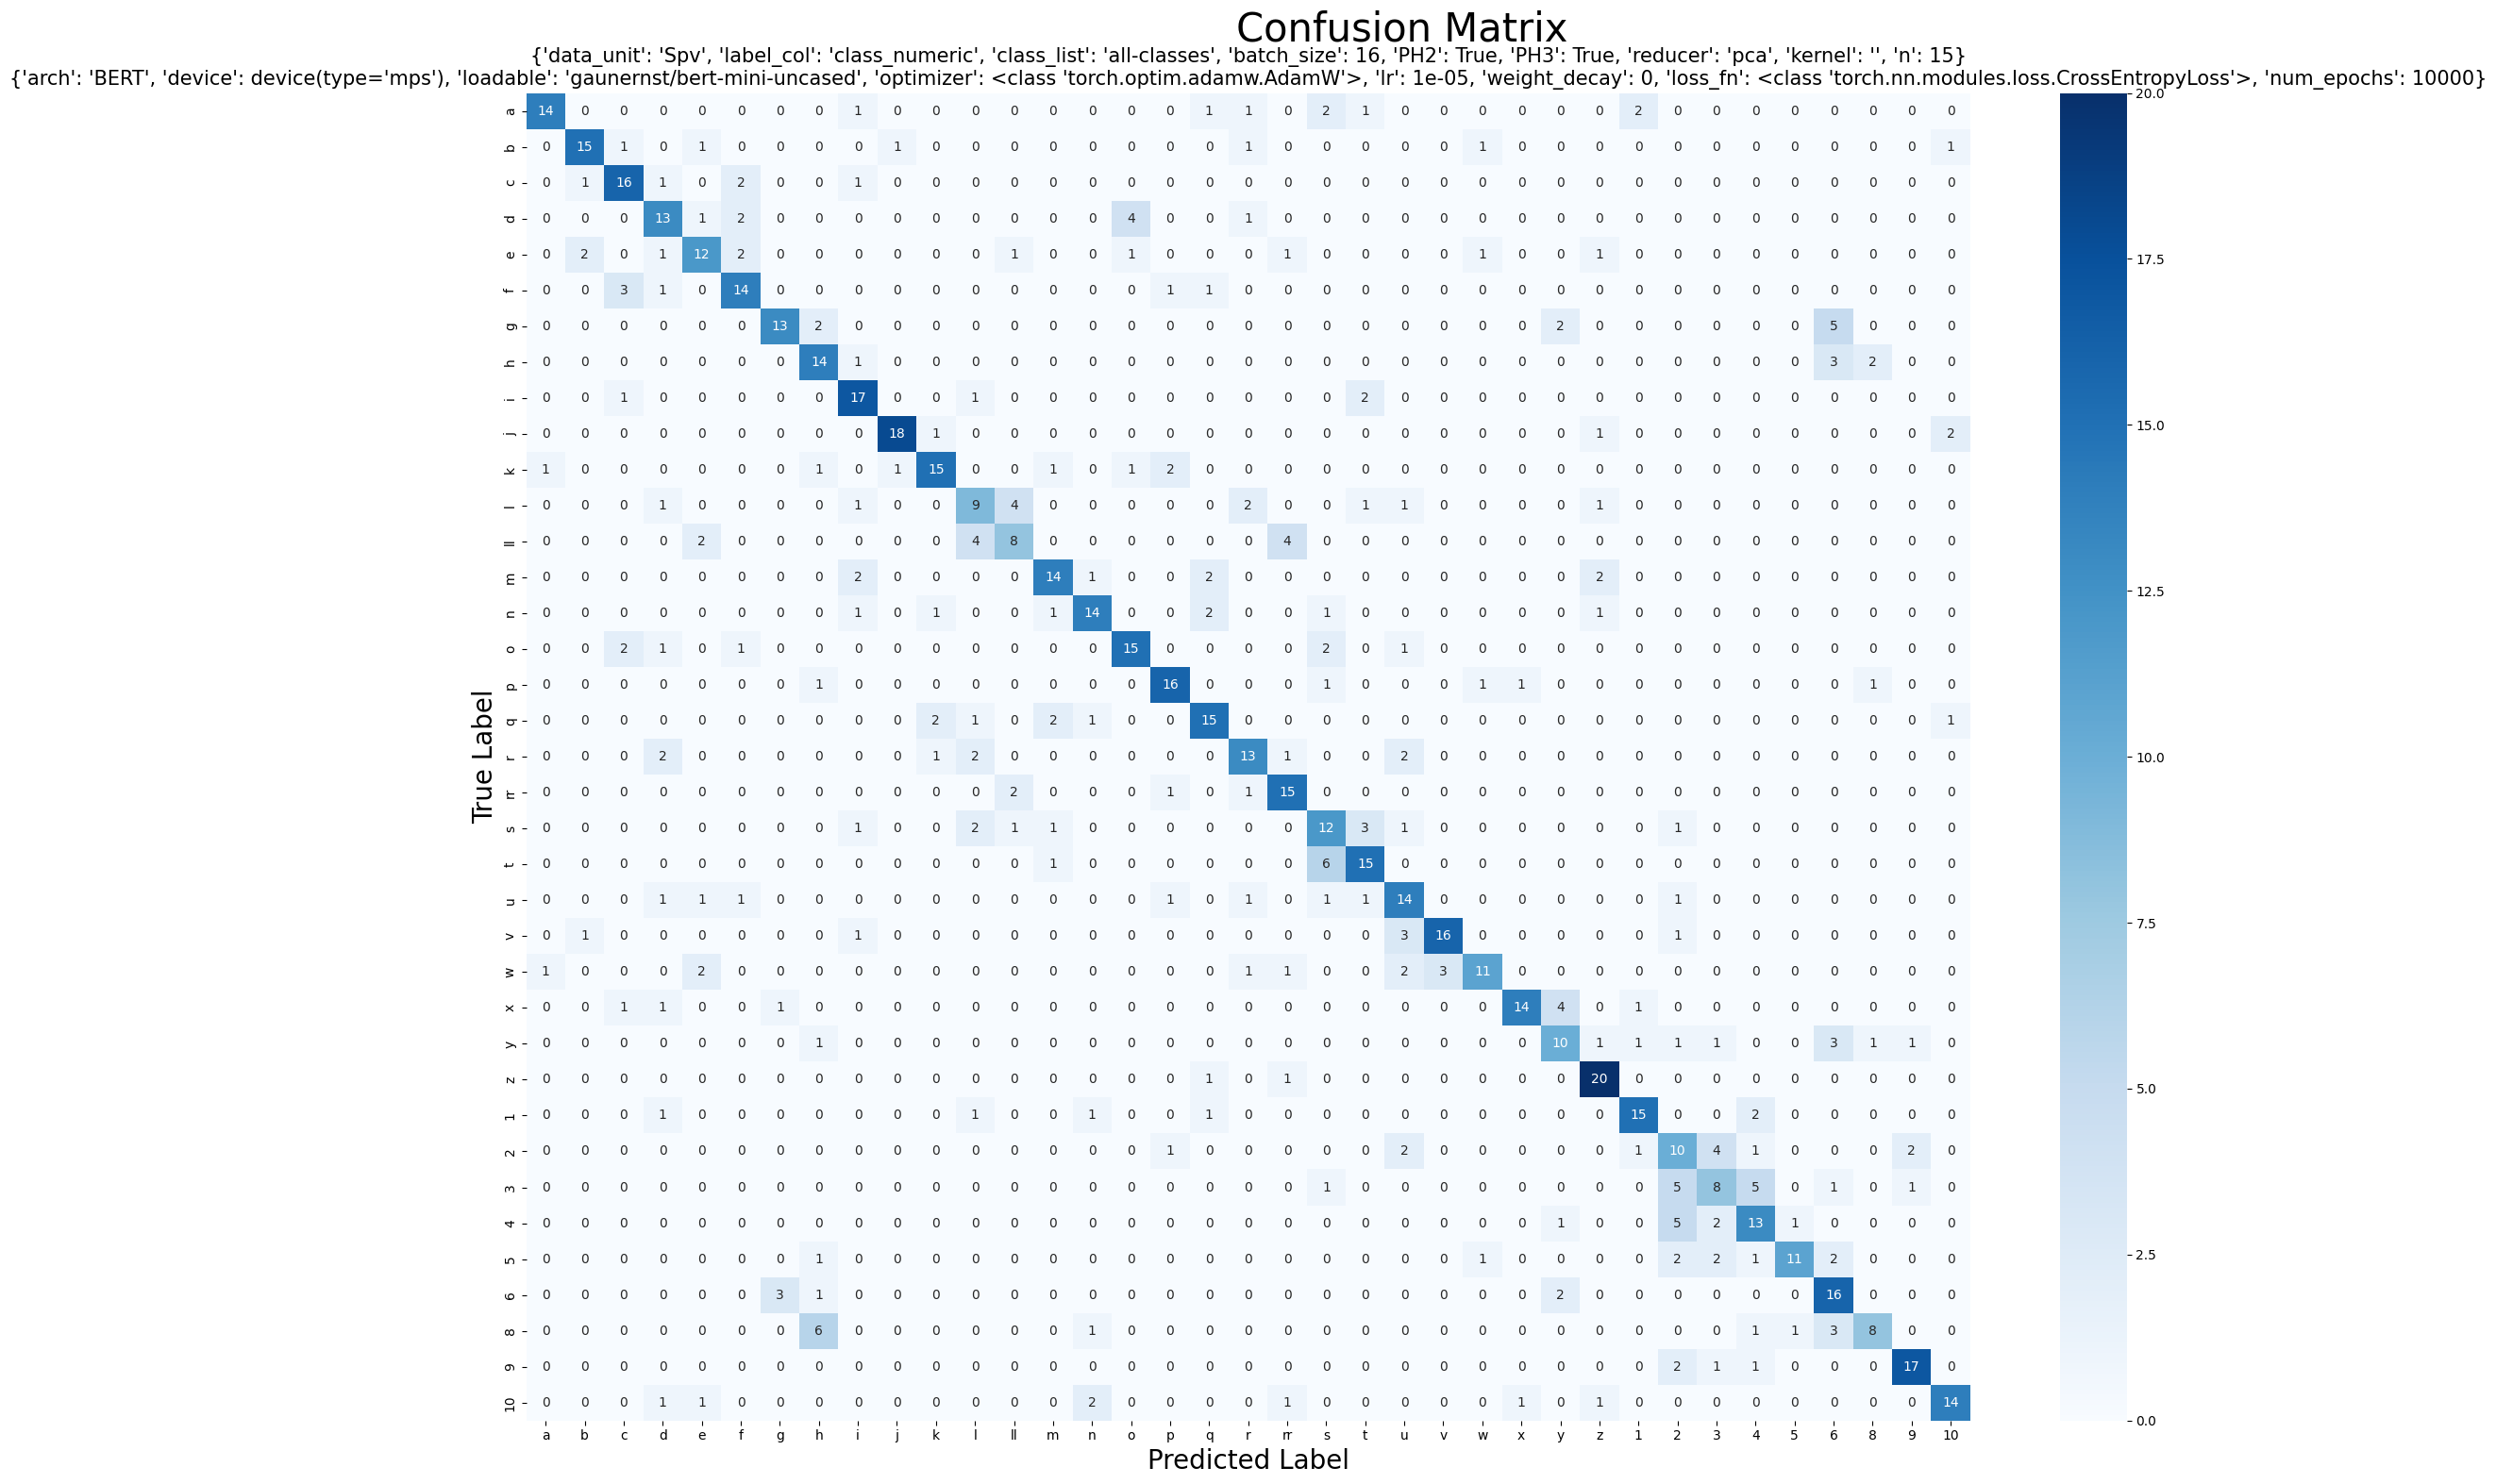

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

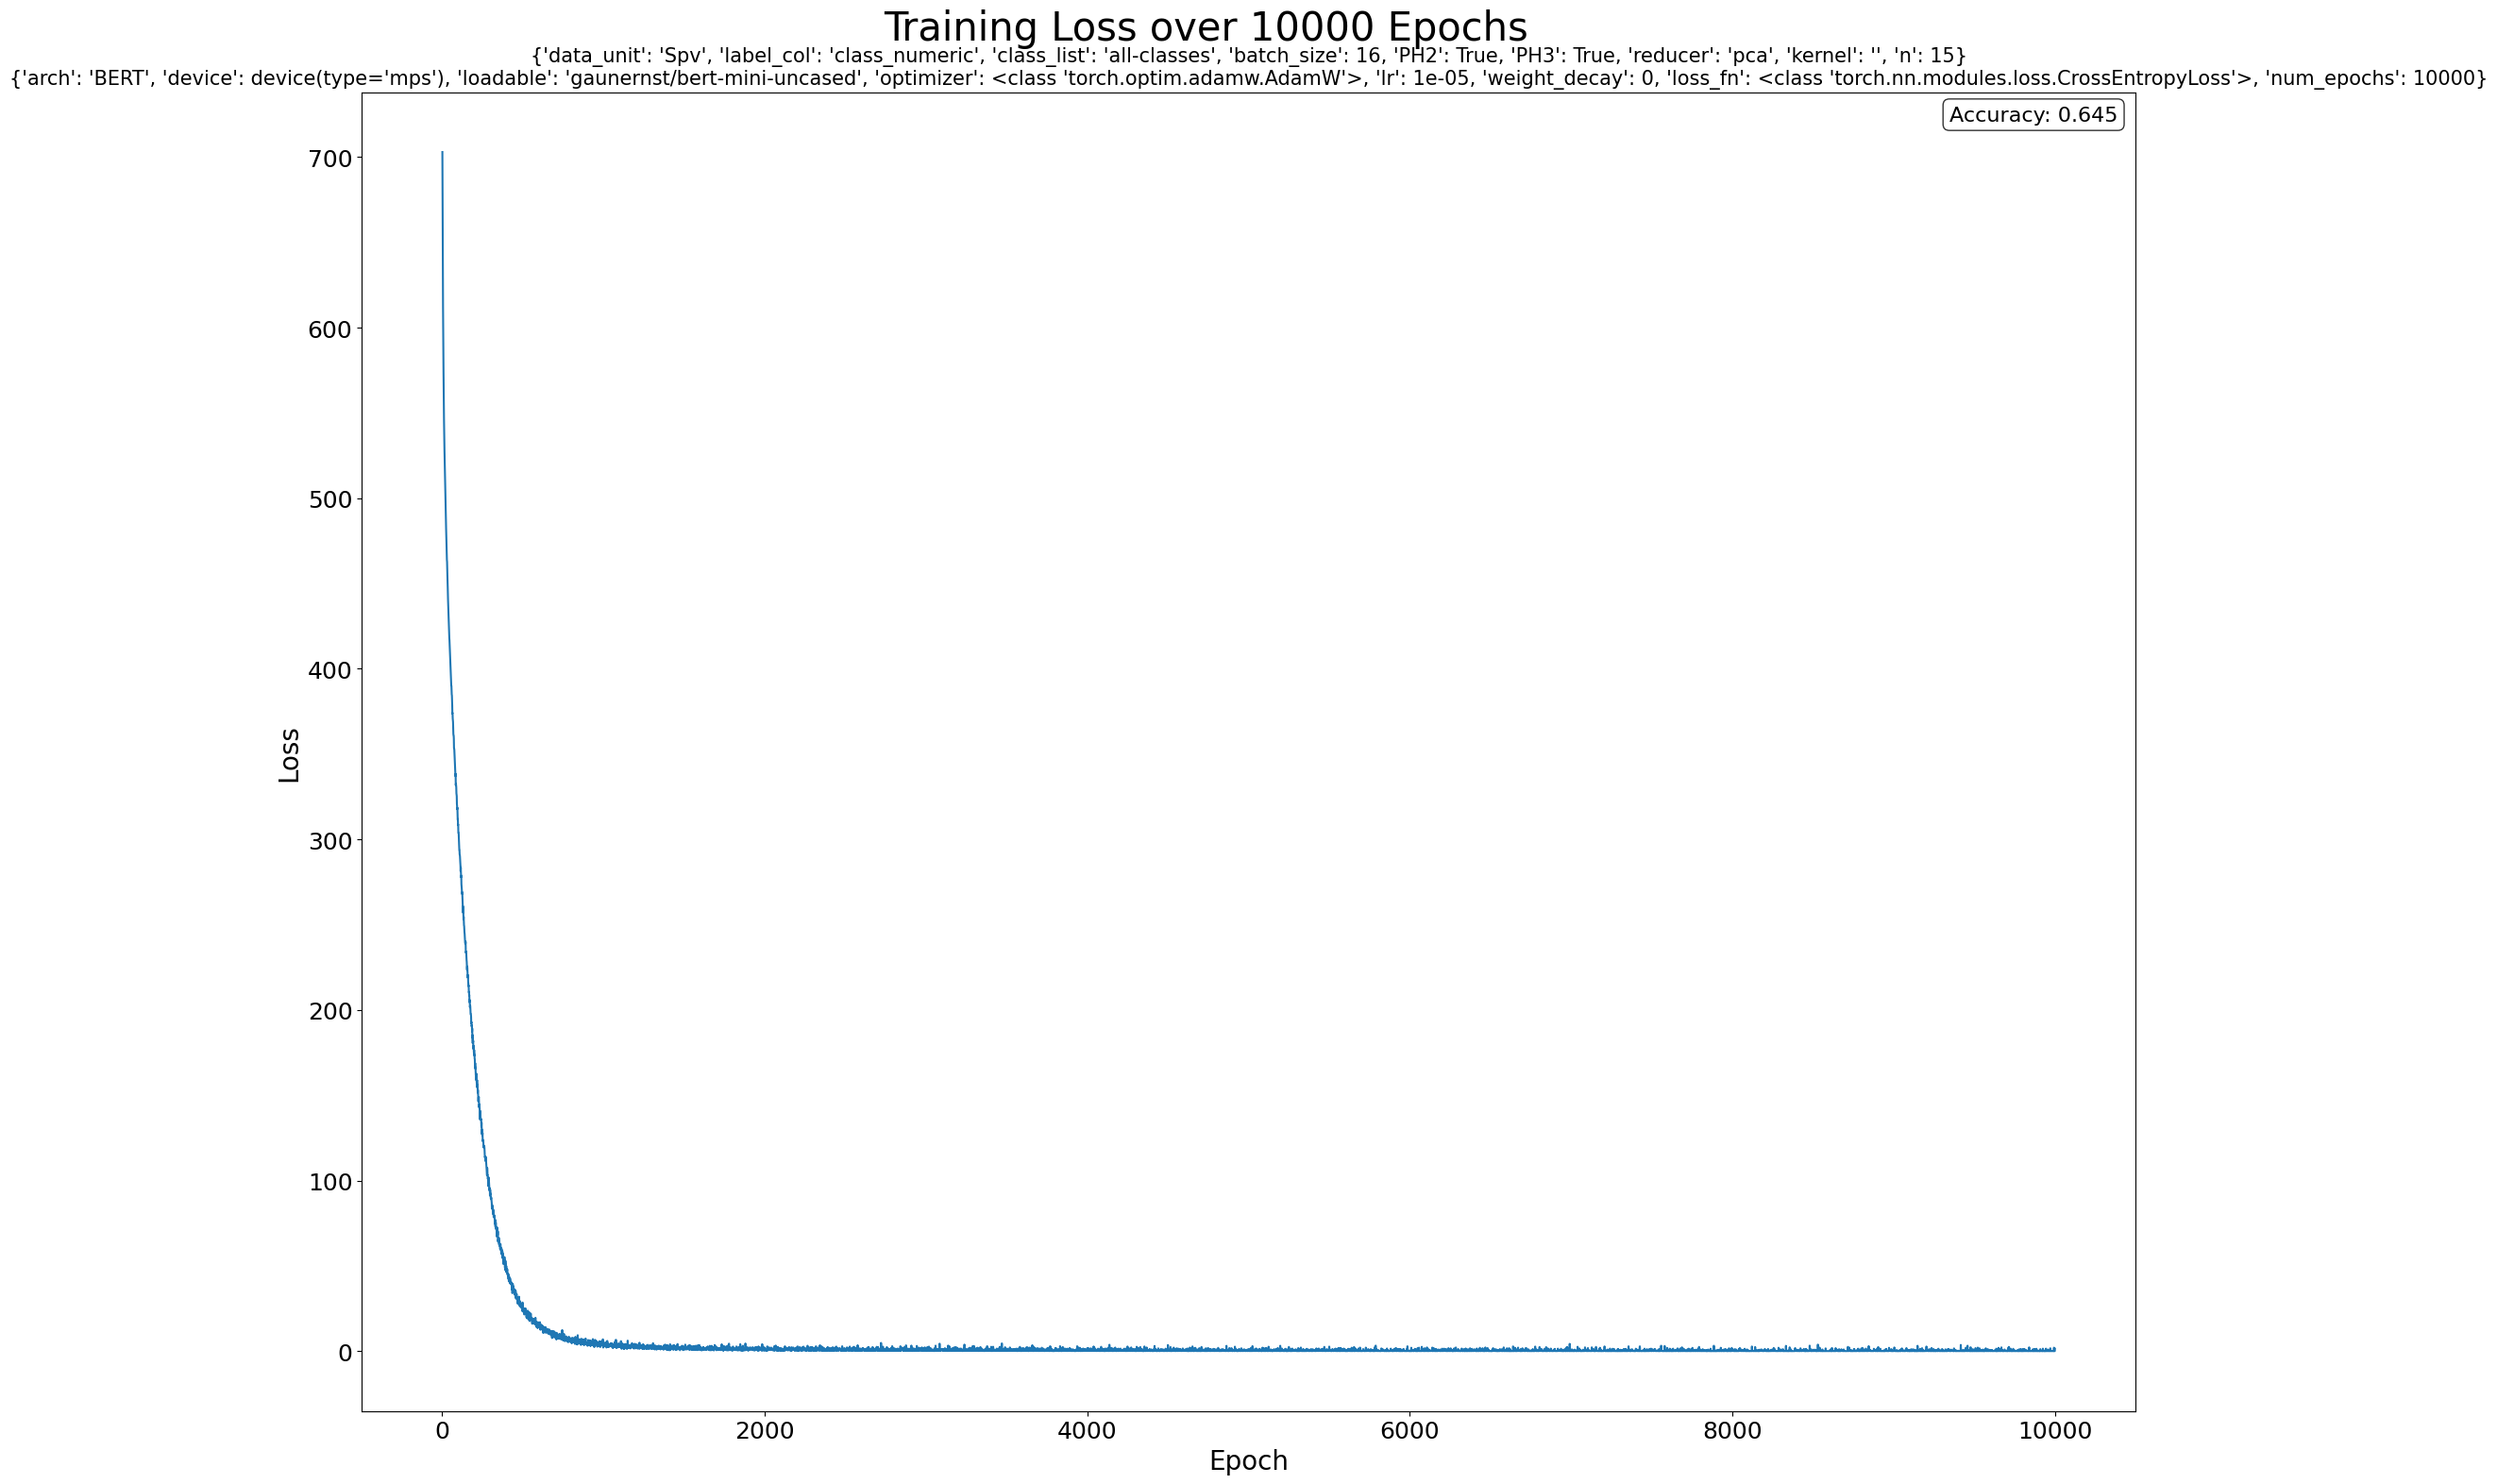

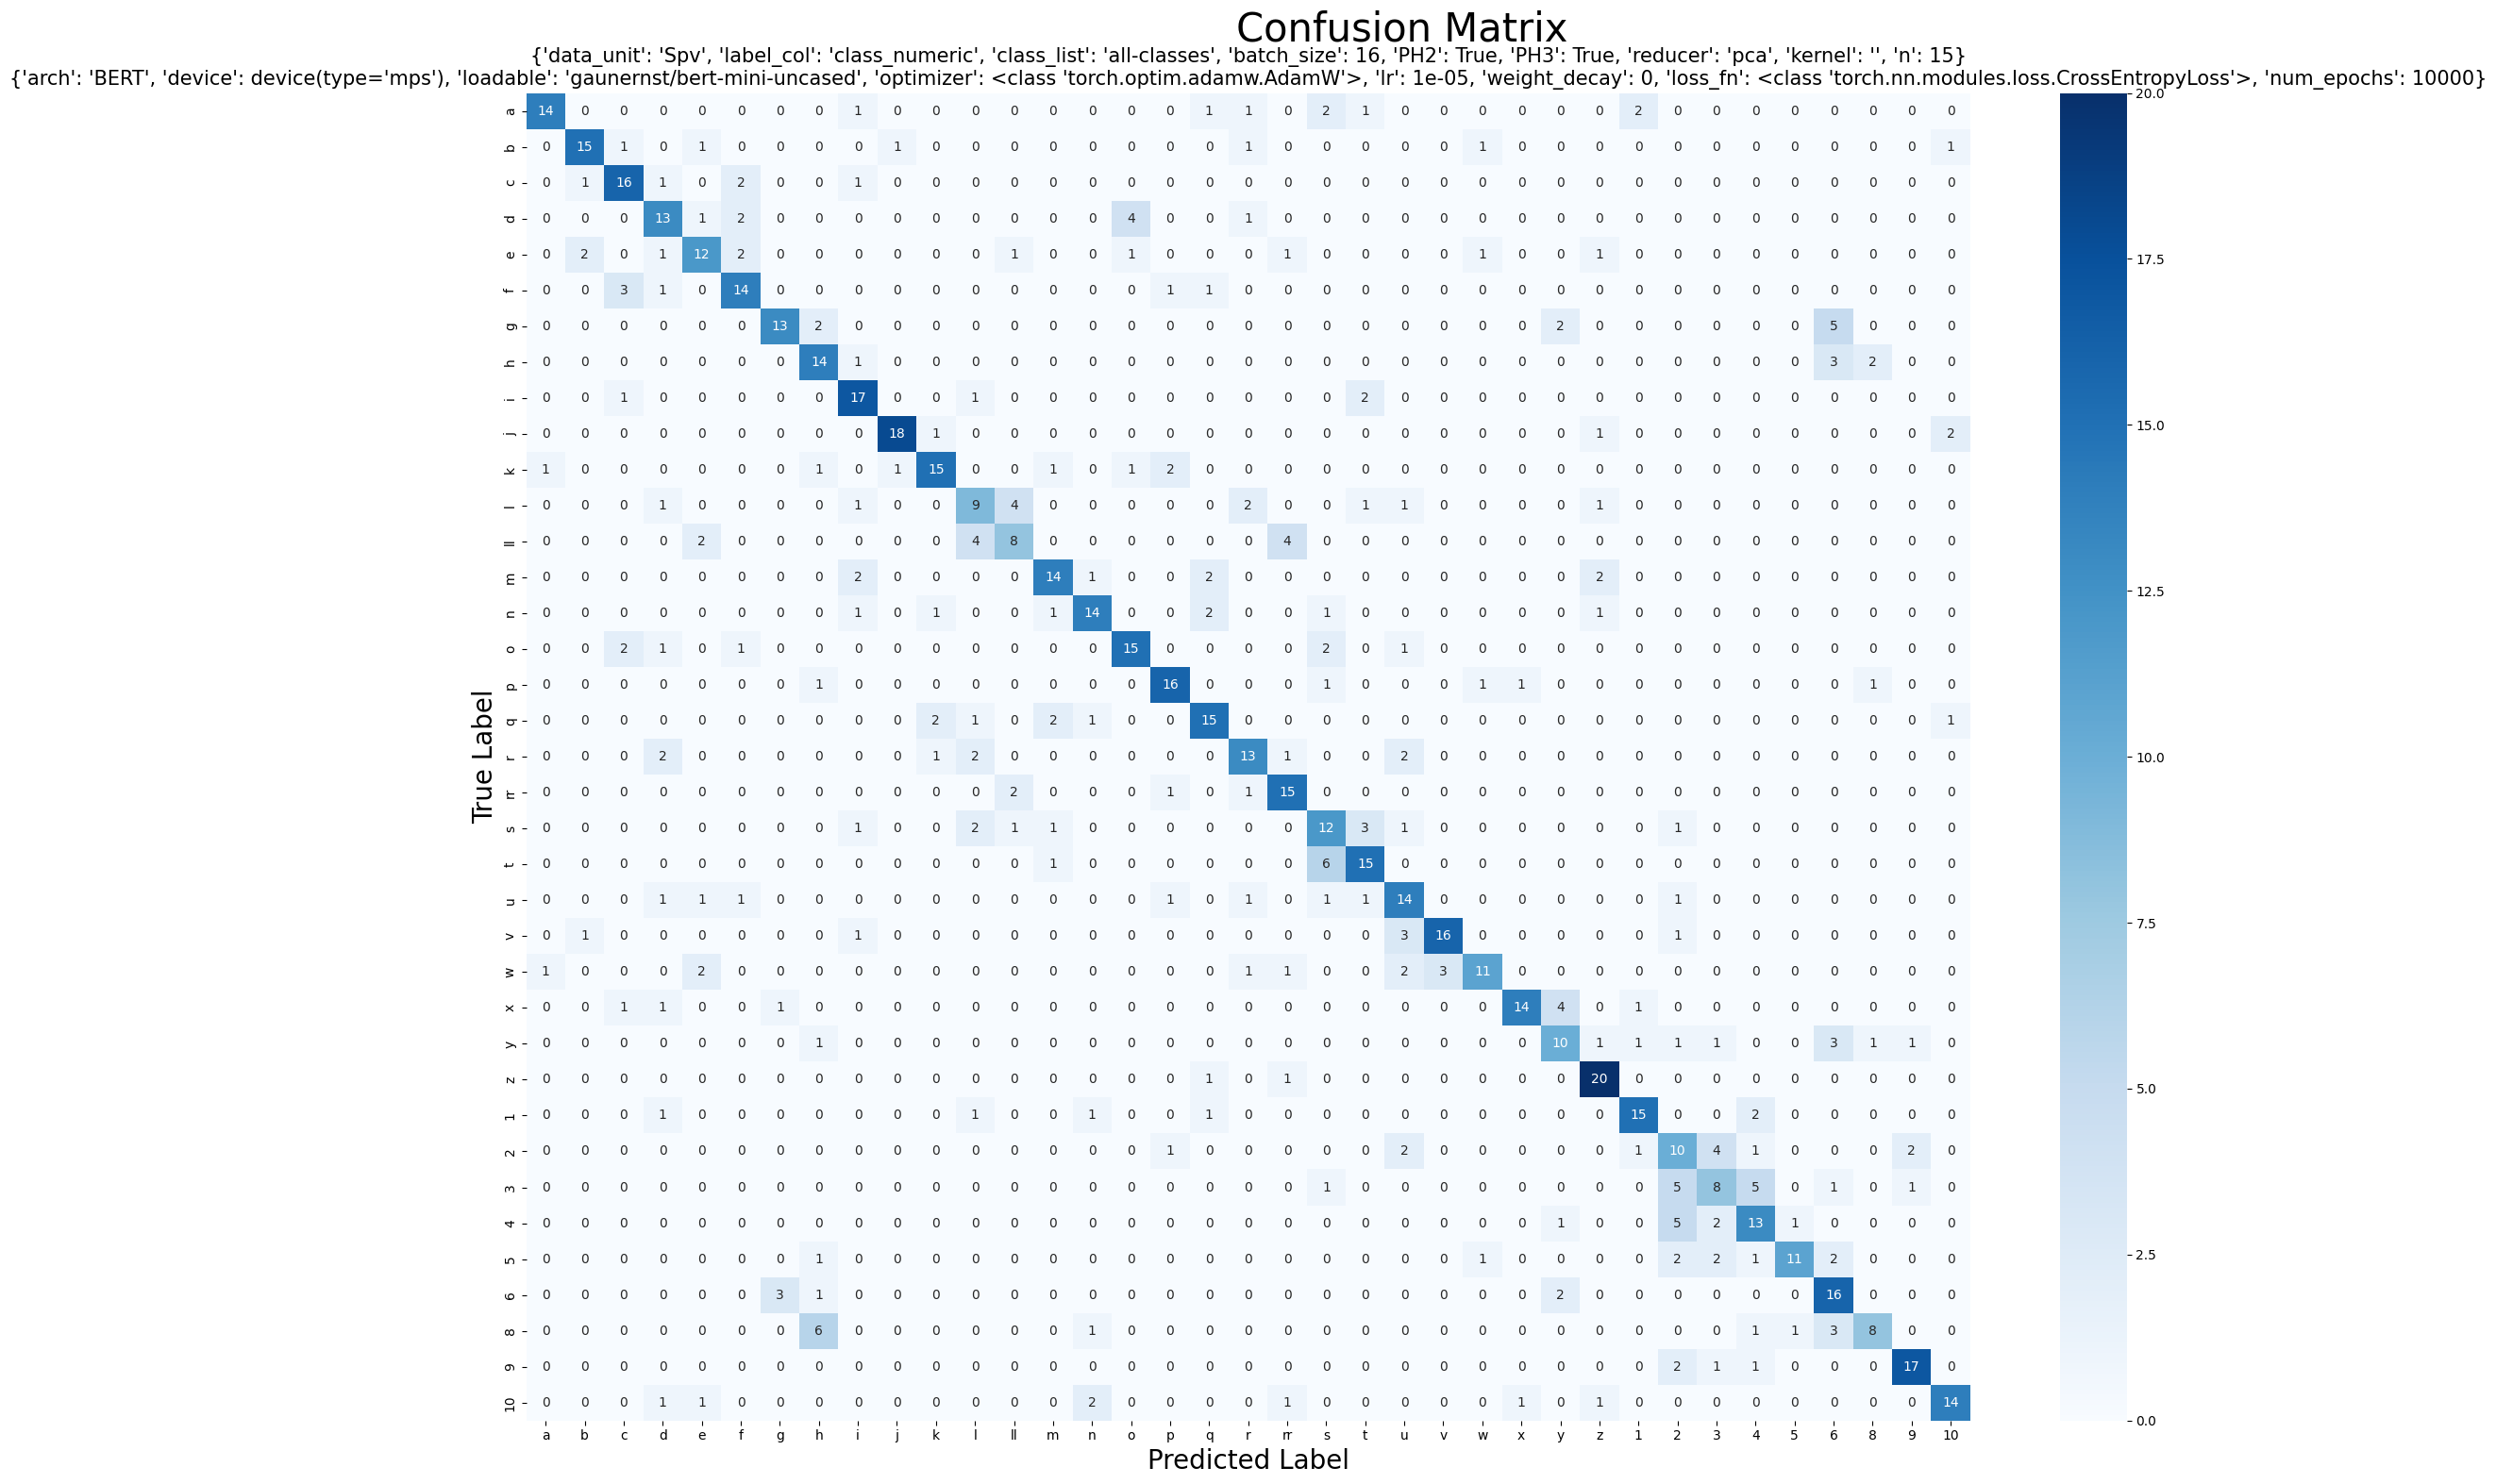

In [10]:
model.keep()
#bert.clean_bert()